### 38 - Incorporating Scikit Learn

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
df = pd.read_csv("Advertising.csv")

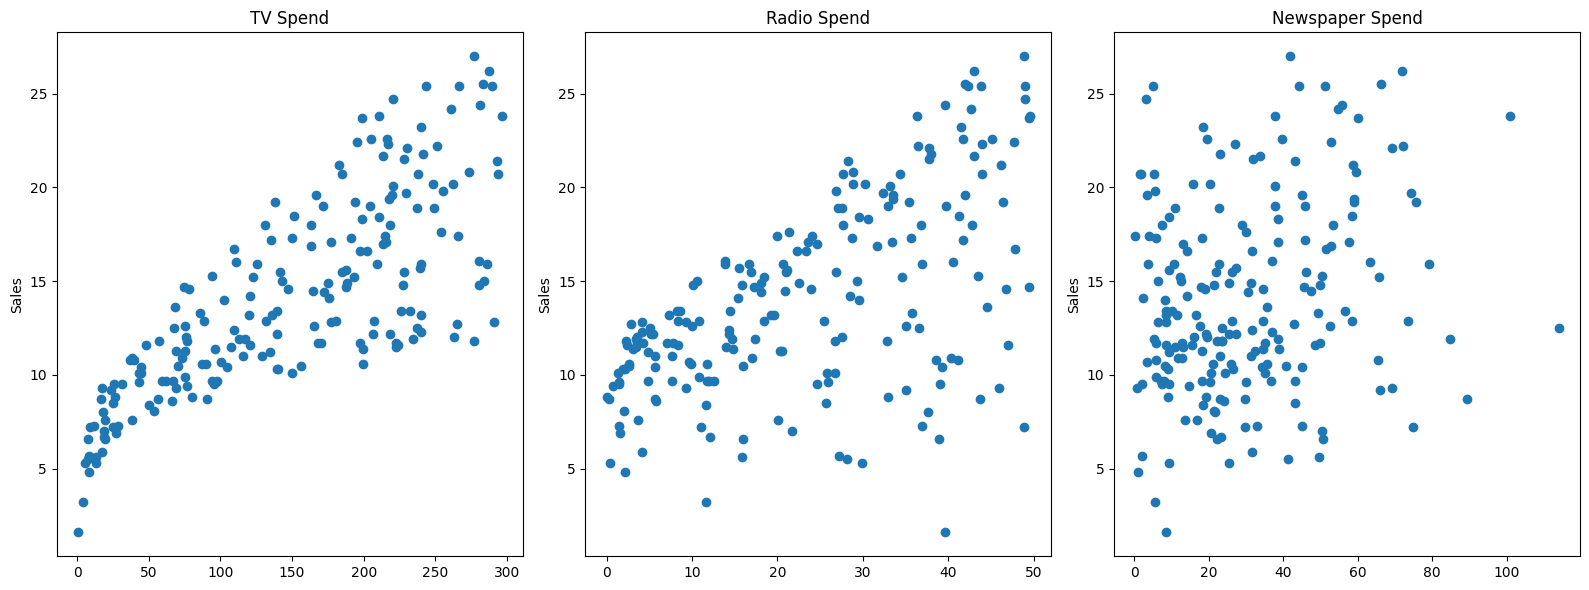

In [35]:
#scatterplot to explore relationships
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")
plt.tight_layout()

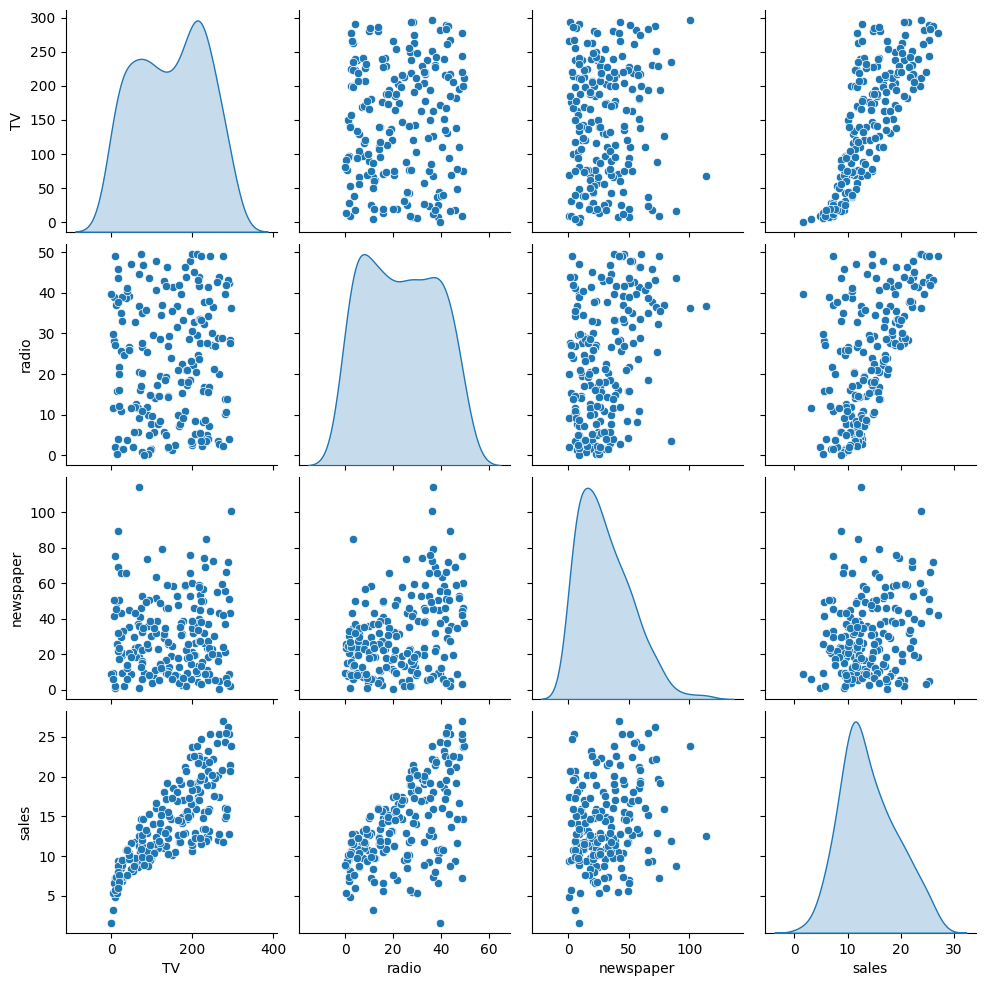

In [36]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

In [37]:
#separate into features and labels
X = df.drop('sales', axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [38]:
#create y vector label
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [39]:
#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [40]:
#take a look at training and testing lengths
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

140
60
140
60


In [41]:
#create the model
model = LinearRegression()
#train the model
model.fit(X_train,y_train)

LinearRegression()

In [42]:
#predict model
test_predictions = model.predict(X_test)

In [43]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

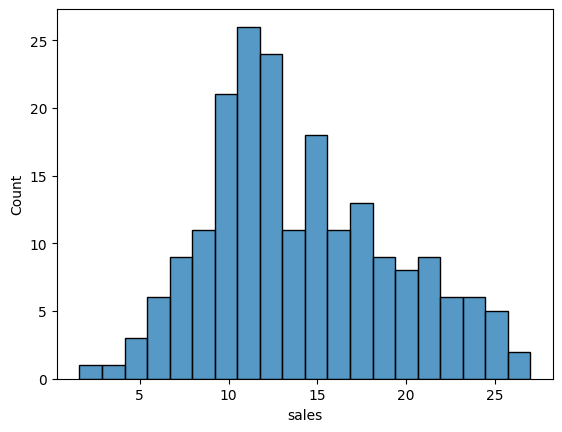

In [44]:
sns.histplot(data=df, x='sales', bins=20)

In [49]:
#put metrics into variables
MAE = mean_absolute_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [50]:
MAE

1.5116692224549086

In [51]:
RMSE

1.9485372043446387

In [52]:
#plot residuals
test_residuals = y_test - test_predictions
test_residuals

95     0.334604
15     1.211772
30    -0.151071
158   -3.589238
128    2.497680
115   -0.755569
69     1.103075
170    1.049715
174   -1.775471
45    -0.224495
66     0.485570
182    2.174572
165   -2.402060
78    -3.670260
186    0.843204
177   -0.304544
56    -3.415494
152    0.443807
82     1.004171
68     0.175264
124   -0.068218
16    -1.274690
148   -1.596389
93     0.664982
65     1.691393
60     2.488020
84     0.782405
67     1.593723
125    1.519234
132   -2.814120
9     -1.576049
18     1.330806
55     1.969910
75    -4.077706
150   -2.001136
104    0.624092
135   -2.662026
137   -0.138265
164    1.060612
76     2.518094
79     1.486676
197    0.395137
38    -0.070454
24     1.609186
122   -1.563884
195    2.375645
29     1.211062
19     0.506693
143    1.709755
86     0.338802
114   -1.118484
173    0.068431
5     -6.153607
126   -4.553147
117    3.063632
73     1.238420
140    1.480429
98     1.144835
172   -0.095191
96    -0.453176
Name: sales, dtype: float64

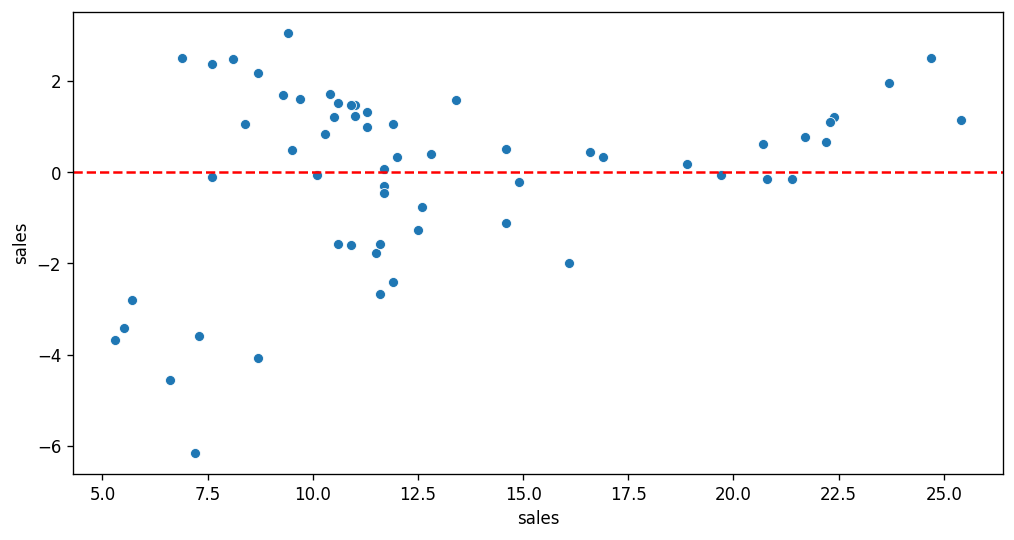

In [55]:
plt.figure(figsize=(10,5), dpi=120)
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')

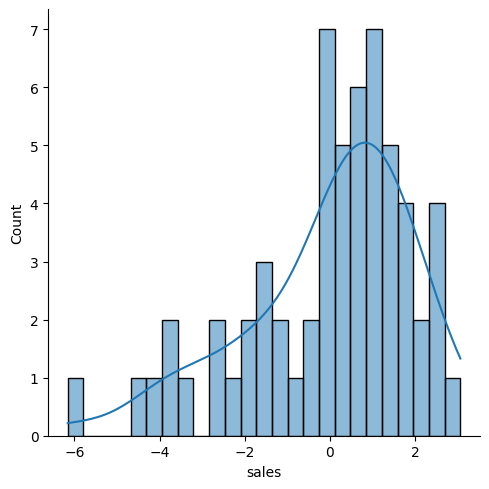

In [58]:
sns.displot(test_residuals, bins=25, kde=True)

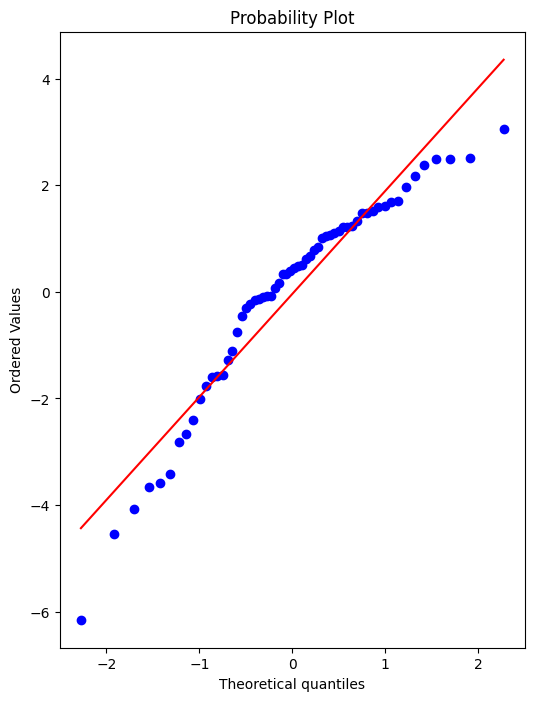

In [61]:
#use scipy to compare quantiles to the theoretical ones
import scipy as sp 
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
#we want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals, plot=ax)

In [62]:
#model deployment
final_model = LinearRegression()

#fit final model on entire dataset
final_model.fit(X,y)

LinearRegression()

In [63]:
#save model
#coef reports back beta coefficients
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

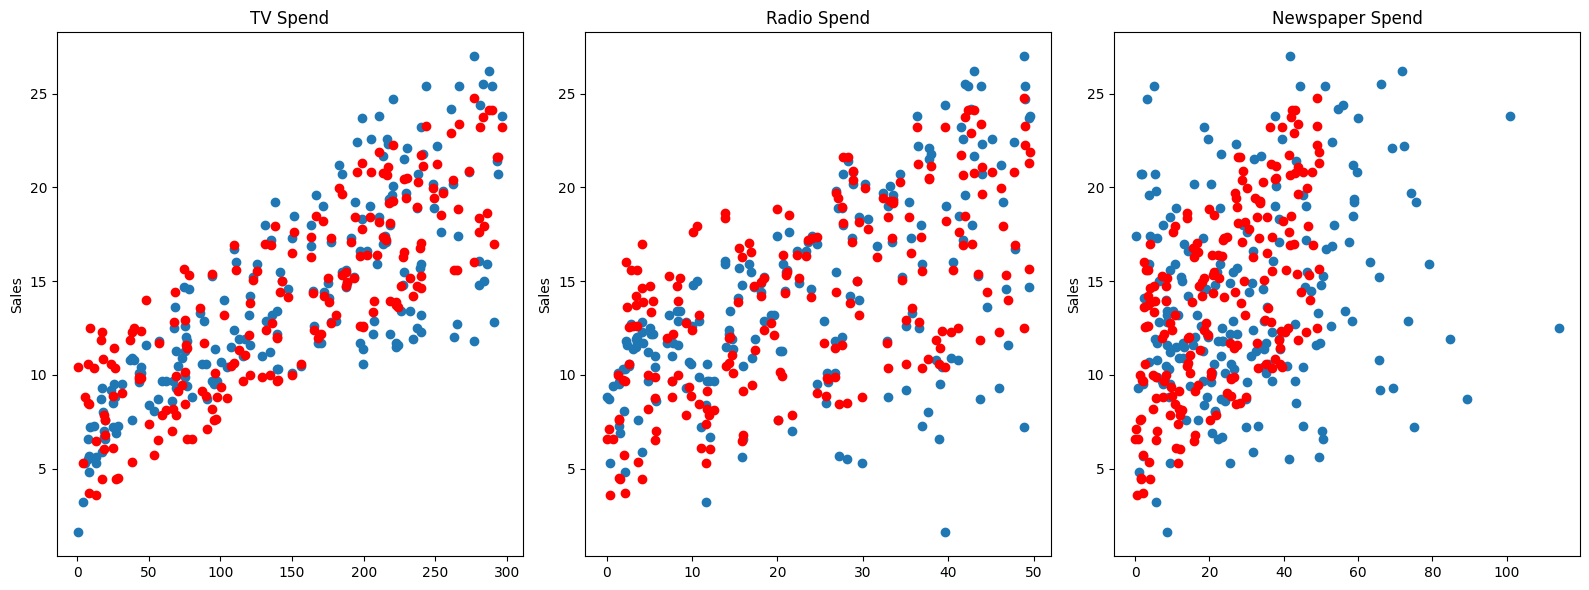

In [66]:
#predictions
y_hat = final_model.predict(X)
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")
plt.tight_layout()

In [68]:
#prediction on new data:
campaign = [[149,22,12]]
final_model.predict(campaign)

c:\Users\Armand S\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [69]:
from joblib import dump,load

dump(final_model, 'sales_model.joblib') 


['sales_model.joblib']

In [70]:
loaded_model = load('sales_model.joblib')

In [72]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])